In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv', header=None)
df= df.rename(columns={0: "years", 1: "data"})

df

,years,data
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


<Axes: xlabel='years', ylabel='data'>

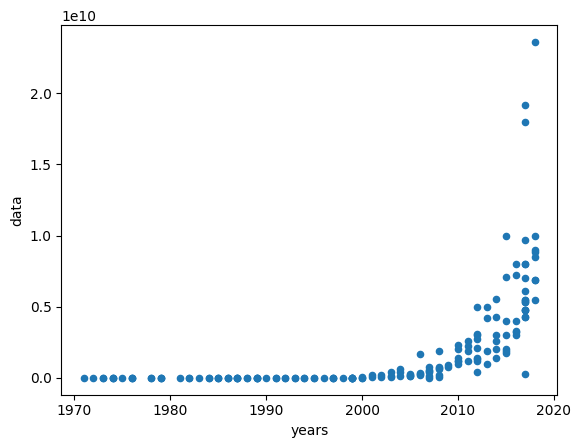

In [3]:
df.plot(kind='scatter', x='years', y='data')

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [52]:
# 1. Prepare Data
# Get the raw data
X = df['years'].values.reshape(-1, 1).astype(np.float32)
Y = df['data'].values.reshape(-1, 1).astype(np.float32)

# Apply reduction of scale (Normalization) to X to make training easier/converge faster
mx = X.mean()
sx = X.std()
X_norm = (X - mx) / sx

# Apply Log to Y to handle exponential growth (Linearize the data)
Y_log = np.log(Y)

# Convert to PyTorch tensors
inputs = torch.from_numpy(X_norm)
targets = torch.from_numpy(Y_log)

In [53]:
# 2. Define Model
# We use a simple Linear Regression model: y = wx + b
model = nn.Linear(1, 1)

# Loss and Optimizer
# MSE Loss (Mean Squared Error)
criterion = nn.MSELoss()
# SGD (Stochastic Gradient Descent) with Momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [54]:
# 3. Train the Model
n_epochs = 100
losses = []

for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Record the loss
    losses.append(loss.item())

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    if (it + 1) % 10 == 0:
        print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 10/100, Loss: 51.0444
Epoch 20/100, Loss: 20.3999
Epoch 30/100, Loss: 13.7747
Epoch 40/100, Loss: 1.2652
Epoch 50/100, Loss: 2.8645
Epoch 60/100, Loss: 0.8897
Epoch 70/100, Loss: 1.0790
Epoch 80/100, Loss: 0.8974
Epoch 90/100, Loss: 0.8840
Epoch 100/100, Loss: 0.8779


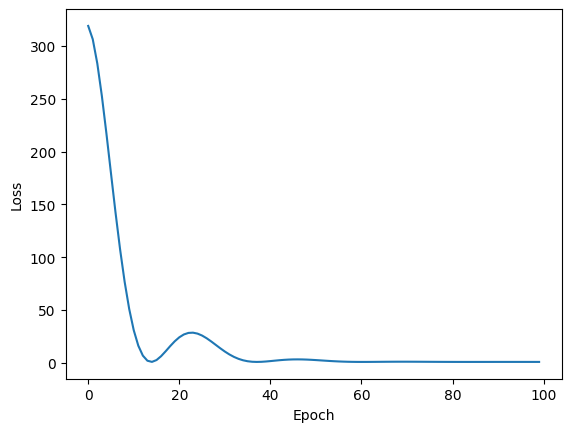

In [55]:
# Plot the loss per epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

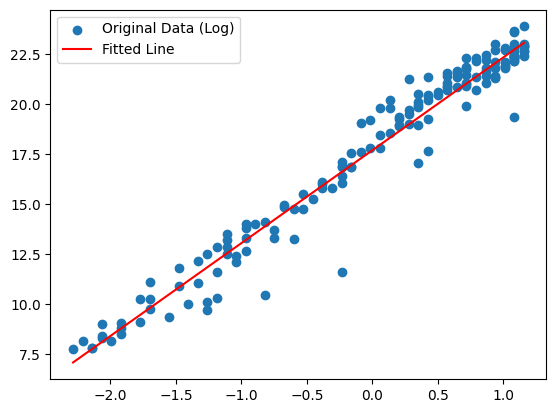

In [56]:
# 4. Check prediction (Validation)
# We plot our line against the log-transformed data
predicted = model(inputs).detach().numpy()
plt.scatter(X_norm, Y_log, label='Original Data (Log)')
plt.plot(X_norm, predicted, color='red', label='Fitted Line')
plt.legend()
plt.show()

In [57]:
# 5. Inspect Learning Parameters
w = model.weight.data.numpy()[0][0]
b = model.bias.data.numpy()[0]
print("Weight:", w, "Bias:", b)


Weight: 4.6429996 Bias: 17.692266


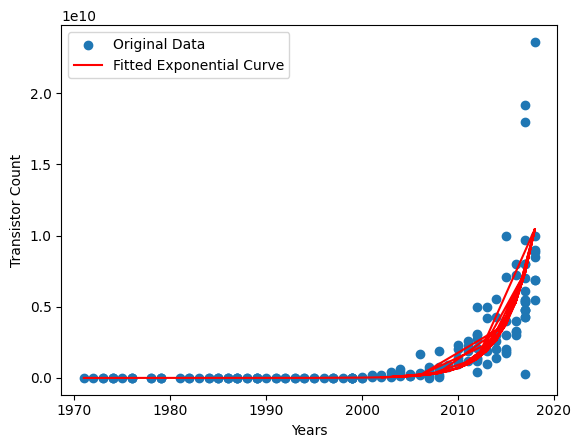

In [58]:
# 6. Plot in Linear Scale (Exponential Curve)
# Get predicted log values
predicted_log = model(inputs).detach().numpy()

# Convert back to linear scale (inverse log is exp)
predicted_linear = np.exp(predicted_log)

# Plot original data and the fitted exponential curve
plt.scatter(X, Y, label='Original Data')
plt.plot(X, predicted_linear, color='red', label='Fitted Exponential Curve')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Transistor Count')
plt.show()